Вариант №87, исходные данные:


In [42]:
import numpy as np
data = np.array([[ 6.90495343, 0.57259636],
[ 6.70832496, 0.88770971],
[13.3147797 ,11.56386065],
[12.46868858,11.23220751],
[13.1170437 ,11.4039673 ],
[ 2.22208356, 5.38177944],
[12.93317223, 9.53248807],
[12.23929344,13.91079398],
[ 6.96994155, 1.31688405],
[ 8.03724128, 1.08122218],
[ 3.17095859, 3.92593366],
[12.41814974, 8.99897542],
[ 1.68415406, 3.92326592],
[ 7.83683216, 1.07971065],
[ 2.15871475, 5.2430366 ],
[12.09731922,12.69956247],
[ 8.08706414, 1.67873409],
[12.18674314, 9.99172076],
[ 2.68096152, 5.05690114],
[ 1.7083877 , 5.26453804],
[ 7.96555459, 1.37379762],
[ 0.37034999, 4.46362407],
[11.68104318,12.15385759],
[11.95815012, 8.56096151],
[11.74222964,11.33606915],
[ 2.66990285, 4.96828358],
[ 2.31062456, 4.14741814],
[ 2.92715479, 5.27727126],
[11.80102161,10.90927802],
[ 7.88799671, 2.03208104],
[ 7.90466308, 0.71909514],
[ 6.55355153, 1.31284508],
[ 6.34863118, 1.4842694 ],
[ 7.09731285, 1.06251461],
[ 1.49901759, 6.11676564],
[ 2.01707718, 4.86912655]])

1. Найти минимальное кол-во кластеров, обеспечивающих приемлемый уровень кластеризации.

/home/makar/PycharmProjects/jupiter_labs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/makar/PycharmProjects/jupiter_labs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/makar/PycharmProjects/jupiter_labs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/makar/PycharmProjects/jupiter_labs/venv/lib/python3.11/site-packages/skle

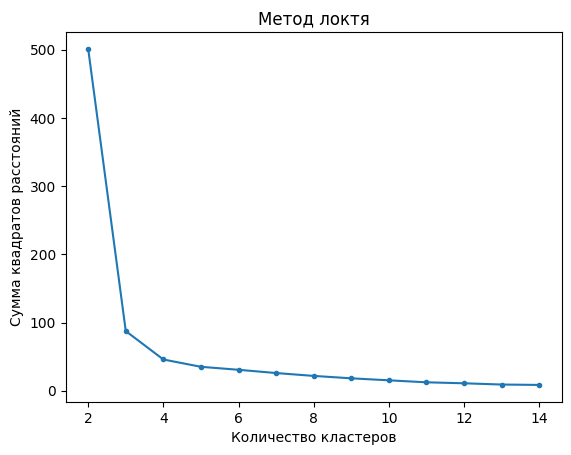

In [43]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

interval = []

for k in range(2,15):
    kmeans = KMeans (n_clusters=k)
    kmeans.fit(data)
    
    #вычеслим сумму квадратов расстояний между точками и центрами для каждого кол-ва кластеров
    interval.append(kmeans.inertia_)

plt.plot(range(2, 15), interval, marker='.')
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов расстояний")
plt.title("Метод локтя")
plt.show()


Проанализировав график, можно сделать вывод, что оптимальное кол-во кластеров равно 3. Тк для определения кол-ва кластеров использовался метод локтя (Elbow Method), оптимальное кол-во можно определить по сгибу. Также оптимальное кол-во можно было определить по функциональной зависимости, в нашем случае - это сумма квадратов расстояний. Данная зависимость не особо меняется после 3х кластеров.

2. Выполнить кластеризацию данного множества точек методом k-средних по найденному
кол-ву кластеров (выбор координат начальных центров масс кластеров не важен).

In [44]:
kmeans = KMeans(n_clusters=3)
# Кластеризация
kmeans.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

print("Метки кластеров:")
print(cluster_labels)

print("Центры кластеров:")
print(cluster_centers)

Метки кластеров:
[2 2 1 0 2 1 1 2 1 0 0 2 0 1 1 0 0 0 0 2 1 0 2 1 0 1 0 0 1 2 2 0 1 1 0 0 1
 1 0 1 2 1 2 2 0 2 2 2 2 0 2 1 0 2 1 1 2]
Центры кластеров:
[[12.08758391 11.08251841]
 [ 7.41323649  2.02073872]
 [ 1.98080745  5.76754507]]


/home/makar/PycharmProjects/jupiter_labs/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3. Напечатать:
- количество точек в каждом кластере
- координаты центроидов кластеров.

В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек
Центры кластеров:
[[12.08758391 11.08251841]
 [ 7.41323649  2.02073872]
 [ 1.98080745  5.76754507]]


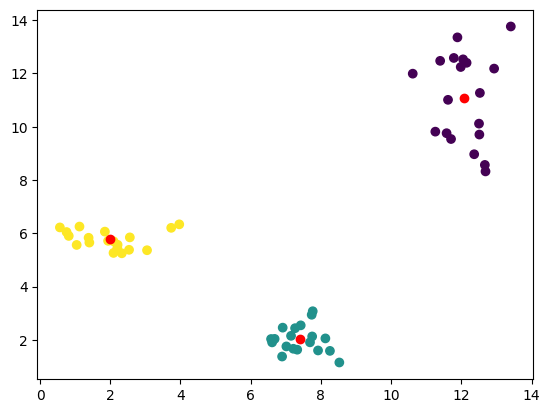

In [45]:
for v in np.unique(cluster_labels):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels == v)} точек"
     )
print("Центры кластеров:")
print(cluster_centers)
plt.scatter(data[:,0], data[:,1], c = cluster_labels )
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], c = "r")
plt.show()

## 4. Выполнить кластеризацию (шаг 2) с визуализацией для 3 любых различных значений параметра random_state ##

random_state - параметр в KMeans который влияет на генерацию центроидов кластеров 

#### Укажем random_state равным 10 ####

Метки кластеров:
[0 0 2 1 0 2 2 0 2 1 1 0 1 2 2 1 1 1 1 0 2 1 0 2 1 2 1 1 2 0 0 1 2 2 1 1 2
 2 1 2 0 2 0 0 1 0 0 0 0 1 0 2 1 0 2 2 0]
Центры кластеров:
[[ 1.98080745  5.76754507]
 [12.08758391 11.08251841]
 [ 7.41323649  2.02073872]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


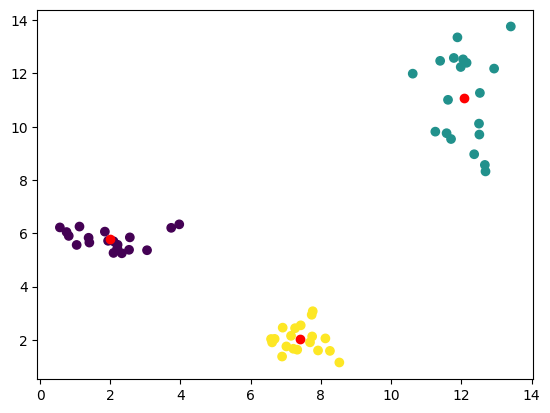

In [46]:
kmeans1 = KMeans(n_clusters=3, random_state=42)
# Кластеризация
kmeans1.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers1 = kmeans1.cluster_centers_
cluster_labels1 = kmeans1.labels_

print("Метки кластеров:")
print(cluster_labels1)

print("Центры кластеров:")
print(cluster_centers1)

for v in np.unique(cluster_labels1):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels1 == v)} точек"
     )
plt.scatter(data[:,0], data[:,1], c = cluster_labels1 )
plt.scatter(cluster_centers1[:,0], cluster_centers1[:,1], c = "r")
plt.show()

#### Укажем random_state равным 267 ####

Метки кластеров:
[2 2 1 0 2 1 1 2 1 0 0 2 0 1 1 0 0 0 0 2 1 0 2 1 0 1 0 0 1 2 2 0 1 1 0 0 1
 1 0 1 2 1 2 2 0 2 2 2 2 0 2 1 0 2 1 1 2]
Центры кластеров:
[[12.08758391 11.08251841]
 [ 7.41323649  2.02073872]
 [ 1.98080745  5.76754507]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


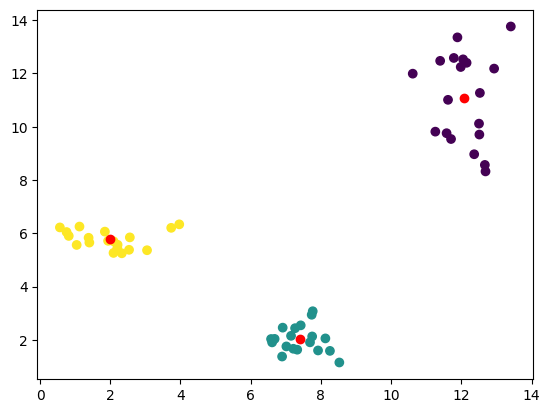

In [47]:
kmeans2 = KMeans(n_clusters=3, random_state=267)
# Кластеризация
kmeans2.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers2 = kmeans2.cluster_centers_
cluster_labels2 = kmeans2.labels_

print("Метки кластеров:")
print(cluster_labels2)

print("Центры кластеров:")
print(cluster_centers2)

for v in np.unique(cluster_labels2):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels2 == v)} точек"
          )
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels2)
plt.scatter(cluster_centers2[:, 0], cluster_centers2[:, 1], c="r")
plt.show()

#### Укажем random_state равным 18777 ####

Метки кластеров:
[0 0 2 1 0 2 2 0 2 1 1 0 1 2 2 1 1 1 1 0 2 1 0 2 1 2 1 1 2 0 0 1 2 2 1 1 2
 2 1 2 0 2 0 0 1 0 0 0 0 1 0 2 1 0 2 2 0]
Центры кластеров:
[[ 1.98080745  5.76754507]
 [12.08758391 11.08251841]
 [ 7.41323649  2.02073872]]
В кластере с меткой 0 содержится 19 точек
В кластере с меткой 1 содержится 19 точек
В кластере с меткой 2 содержится 19 точек


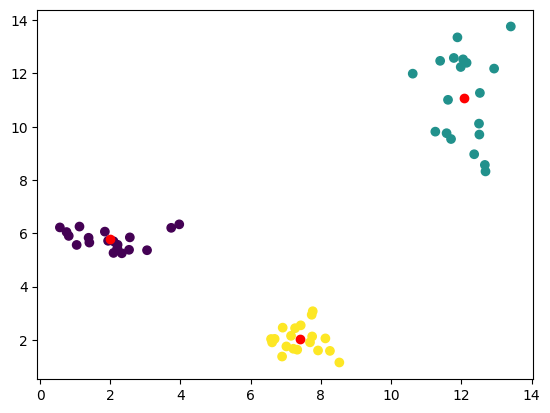

In [48]:
kmeans3 = KMeans(n_clusters=3, random_state=18777)
# Кластеризация
kmeans3.fit(data)

# Получаем центры кластеров и метки кластеров для каждой точки
cluster_centers3 = kmeans3.cluster_centers_
cluster_labels3 = kmeans3.labels_

print("Метки кластеров:")
print(cluster_labels3)

print("Центры кластеров:")
print(cluster_centers3)

for v in np.unique(cluster_labels3):
    print(f"В кластере с меткой {v} содержится {np.sum(cluster_labels3 == v)} точек"
          )
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels3)
plt.scatter(cluster_centers3[:, 0], cluster_centers3[:, 1], c="r")
plt.show()